### Question 1: Use yfinance to Extract Stock Data

In [1]:
import yfinance as yf
import pandas as pd

# Download Tesla stock data
tesla = yf.download("TSLA", start="2010-01-01", end="2025-01-01")

# Reset index
tesla.reset_index(inplace=True)

# Display first 5 rows
print(tesla.head())


C:\Users\Abinaci\AppData\Local\Temp\ipykernel_2464\1258973979.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tesla = yf.download("TSLA", start="2010-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed

Price        Date     Close      High       Low      Open     Volume
Ticker                 TSLA      TSLA      TSLA      TSLA       TSLA
0      2010-06-29  1.592667  1.666667  1.169333  1.266667  281494500
1      2010-06-30  1.588667  2.028000  1.553333  1.719333  257806500
2      2010-07-01  1.464000  1.728000  1.351333  1.666667  123282000
3      2010-07-02  1.280000  1.540000  1.247333  1.533333   77097000
4      2010-07-06  1.074000  1.333333  1.055333  1.333333  103003500


### Use Webscraping to Extract Tesla Revenue Data

In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Step 1: Fetch Tesla revenue page
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/91.0.4472.124 Safari/537.36"
}
response = requests.get(url, headers=headers)

# Step 2: Parse with BeautifulSoup
soup = BeautifulSoup(response.text, "lxml")

# Step 3: Find all tables
tables = soup.find_all("table")

# Tesla Revenue is usually the second table
tesla_revenue = pd.read_html(str(tables[1]))[0]

# Step 4: Clean dataframe
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(r"[\$,]", "", regex=True)
tesla_revenue.dropna(inplace=True)

# Step 5: Display last 5 rows
print(tesla_revenue.tail())


          Date Revenue
59  2010-09-30      31
60  2010-06-30      28
61  2010-03-31      21
63  2009-09-30      46
64  2009-06-30      27


C:\Users\Abinaci\AppData\Local\Temp\ipykernel_2464\624378080.py:21: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(tables[1]))[0]


###  Use yfinance to Extract Stock Data

In [3]:
import yfinance as yf

tesla_data = yf.Ticker("TSLA")
tesla_stock = tesla_data.history(period="max")
tesla_stock.reset_index(inplace=True)
print(tesla_stock.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


###  Use Webscraping to Extract GME Revenue Data

In [5]:
import requests

url = "https://www.macrotrends.net/assets/php/stock_data_export.php?t=GME&type=revenue"
headers = {"User-Agent": "Mozilla/5.0"}

response = requests.get(url, headers=headers)

# Check the first 500 characters to see what we got
print(response.text[:500])


<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8" />
  <meta name="viewport" content="width=device-width, initial-scale=1.0" />
  <title>Oops! Page Not Found | Macrotrends</title>
  <link rel="icon" type="image/x-icon" href="/assets/images/icons/FAVICON/macrotrends-favicon-96.png">
  <style>
    body {
      margin: 0;
      font-family: -apple-system, BlinkMacSystemFont, "Segoe UI", Roboto, Helvetica, Arial, sans-serif;
      background: #f9fbfd;
      color: #333;
      display: 


###  Plot Tesla Stock Graph

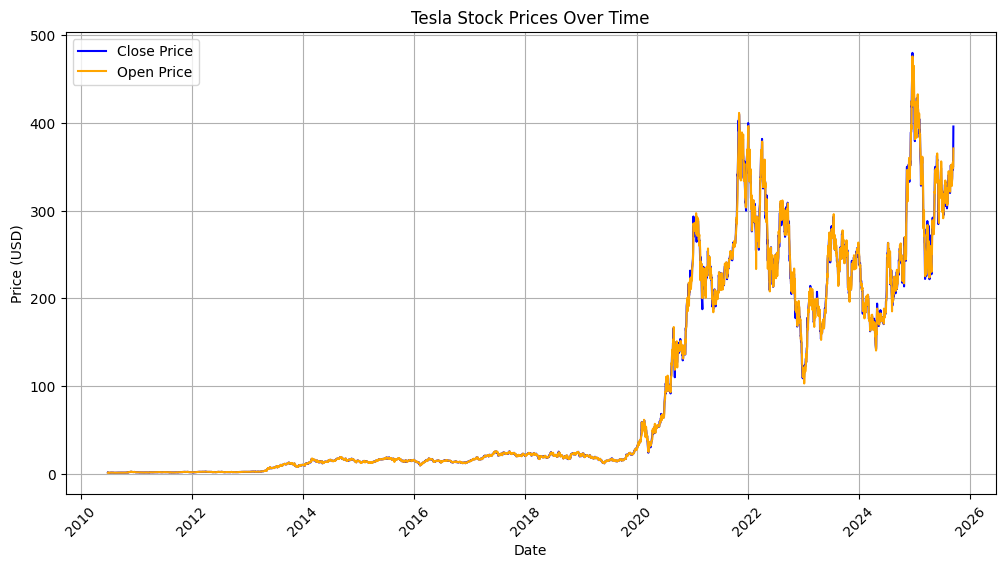

In [6]:
import yfinance as yf
import matplotlib.pyplot as plt

# Step 1: Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")  # this gives a DataFrame

# Step 2: Reset the index so 'Date' becomes a column
tesla_data.reset_index(inplace=True)

# Step 3: Define the make_graph function
def make_graph(df, title):
    plt.figure(figsize=(12,6))
    plt.plot(df['Date'], df['Close'], color='blue', label='Close Price')
    plt.plot(df['Date'], df['Open'], color='orange', label='Open Price')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title(title)
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Step 4: Call the function
make_graph(tesla_data, "Tesla Stock Prices Over Time")



### Plot GameStop Stock Graph



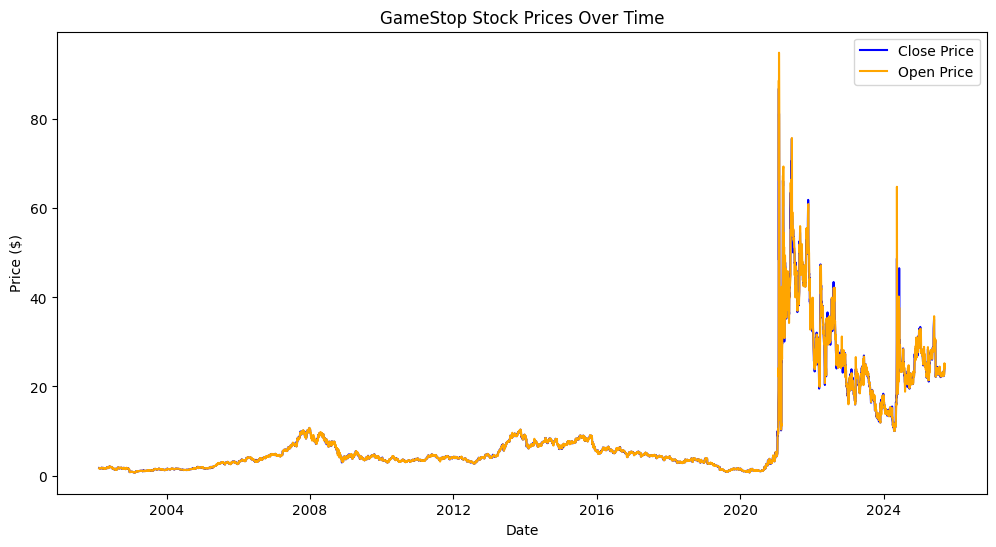

In [7]:
import yfinance as yf
import matplotlib.pyplot as plt

# Step 1: Fetch GameStop stock data
gme_data = yf.Ticker("GME").history(period="max")

# Step 2: Reset index so 'Date' becomes a column
gme_data.reset_index(inplace=True)

# Step 3: Define the make_graph function (if not already defined)
def make_graph(df, title):
    plt.figure(figsize=(12,6))
    plt.plot(df['Date'], df['Close'], color='blue', label='Close Price')
    plt.plot(df['Date'], df['Open'], color='orange', label='Open Price')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.title(title)
    plt.legend()
    plt.show()

# Step 4: Plot the graph
make_graph(gme_data, "GameStop Stock Prices Over Time")
